In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from utils import symbols, get_SMA_filename

In [2]:
symbols

['BTC/USDT',
 'ETH/USDT',
 'BNB/USDT',
 'XRP/USDT',
 'ADA/USDT',
 'ETH/BTC',
 'BNB/BTC',
 'XRP/BTC',
 'ADA/BTC']

In [3]:
dfs = {}

start = 2
stop = 61
step = 1
sample_size = math.inf

for symbol in symbols:
    filename = get_SMA_filename(symbol, start, stop, step, sample_size)
    dfs[symbol] = pd.read_pickle(filename)

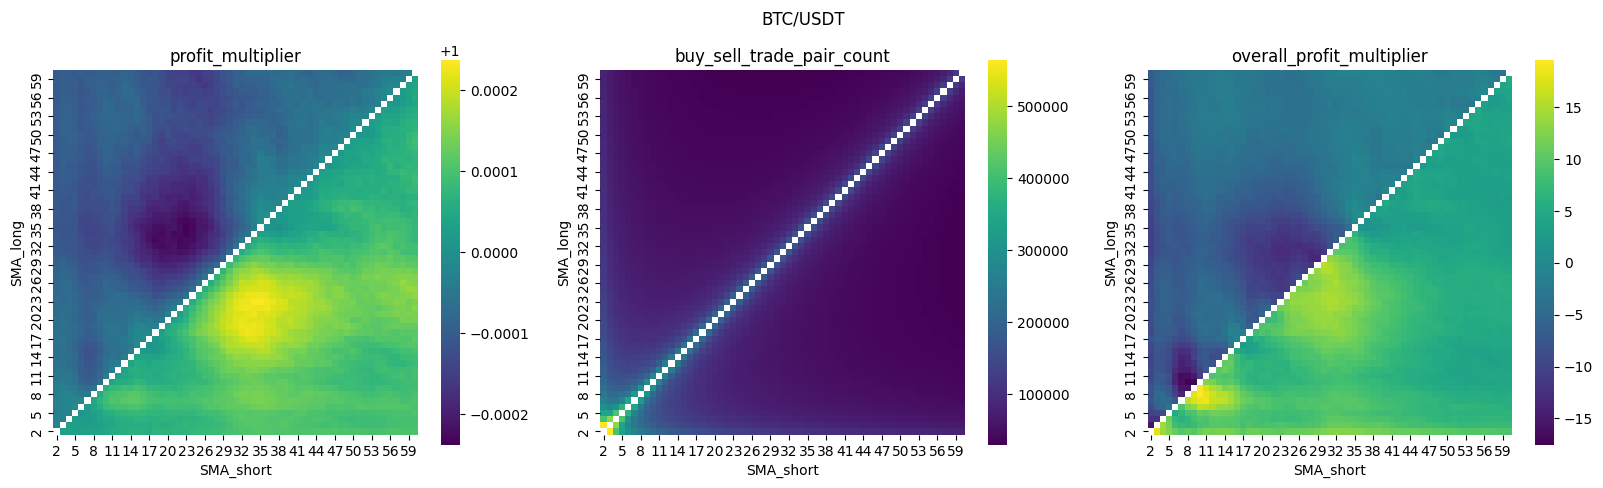

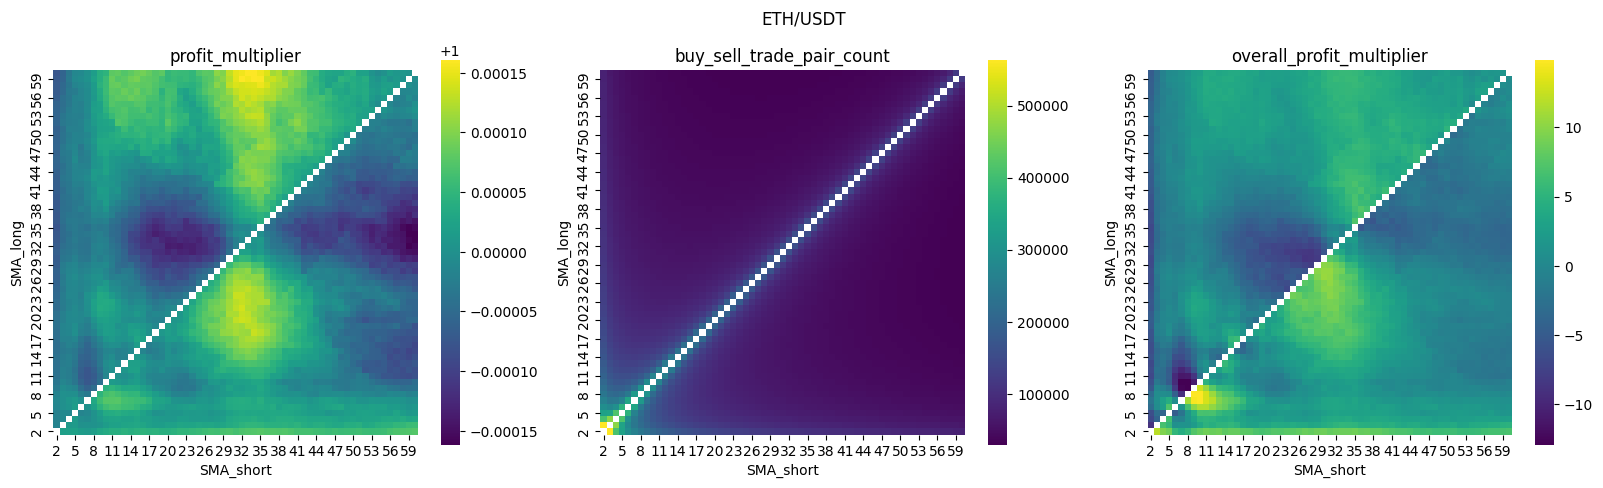

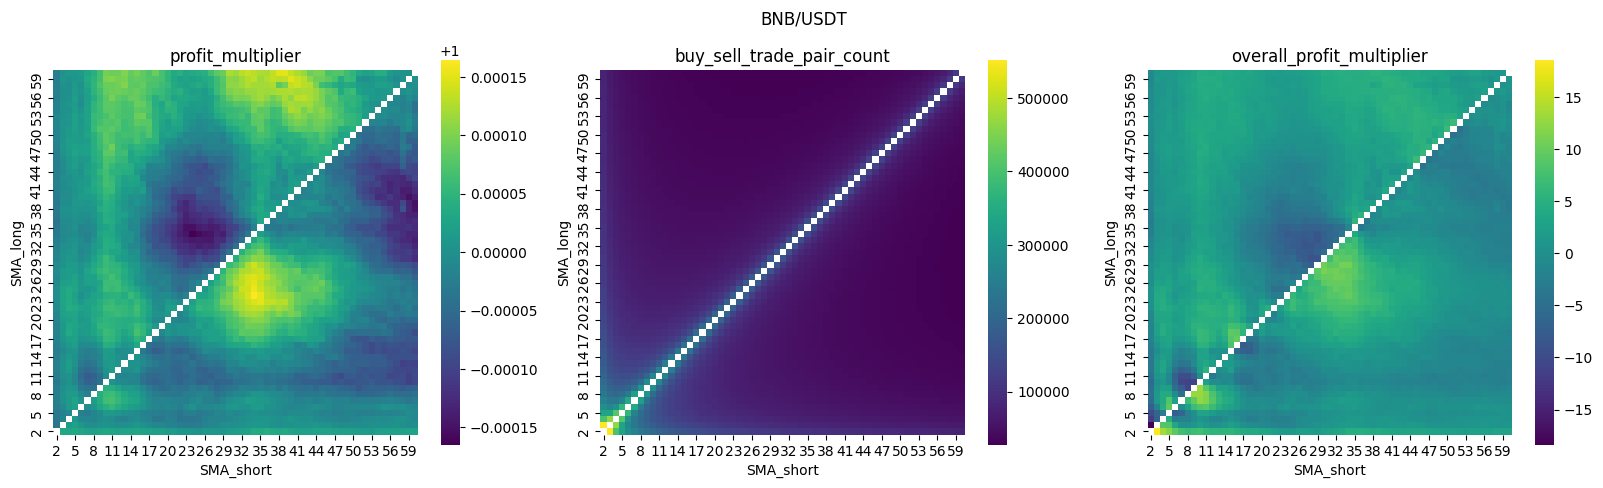

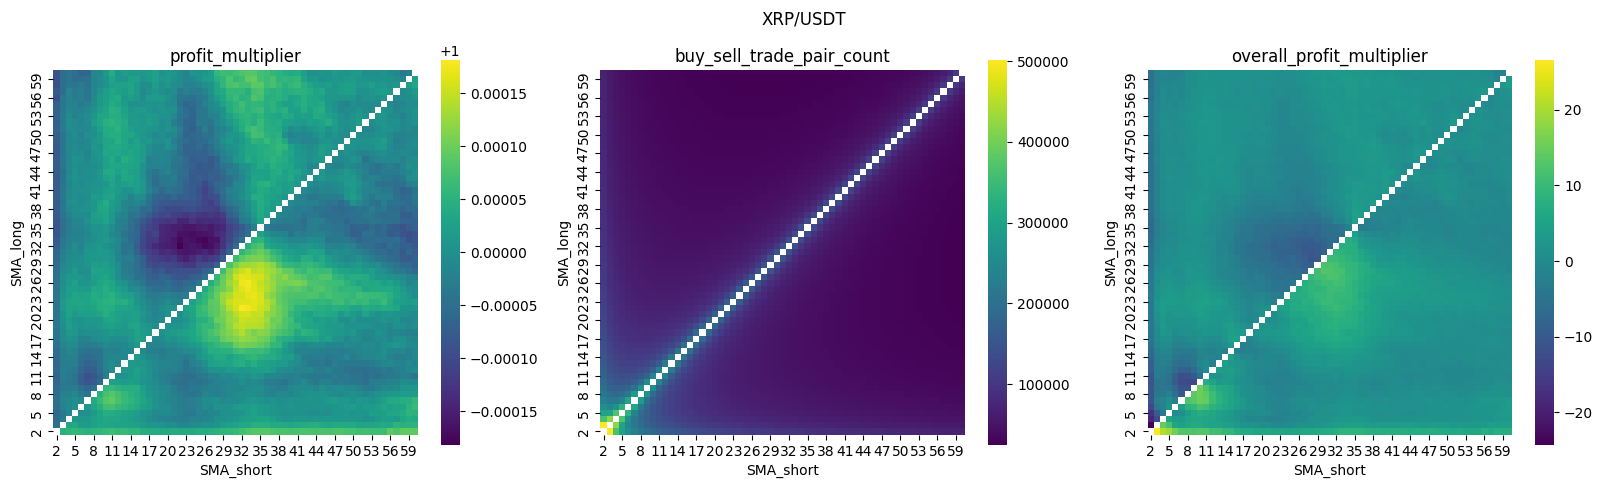

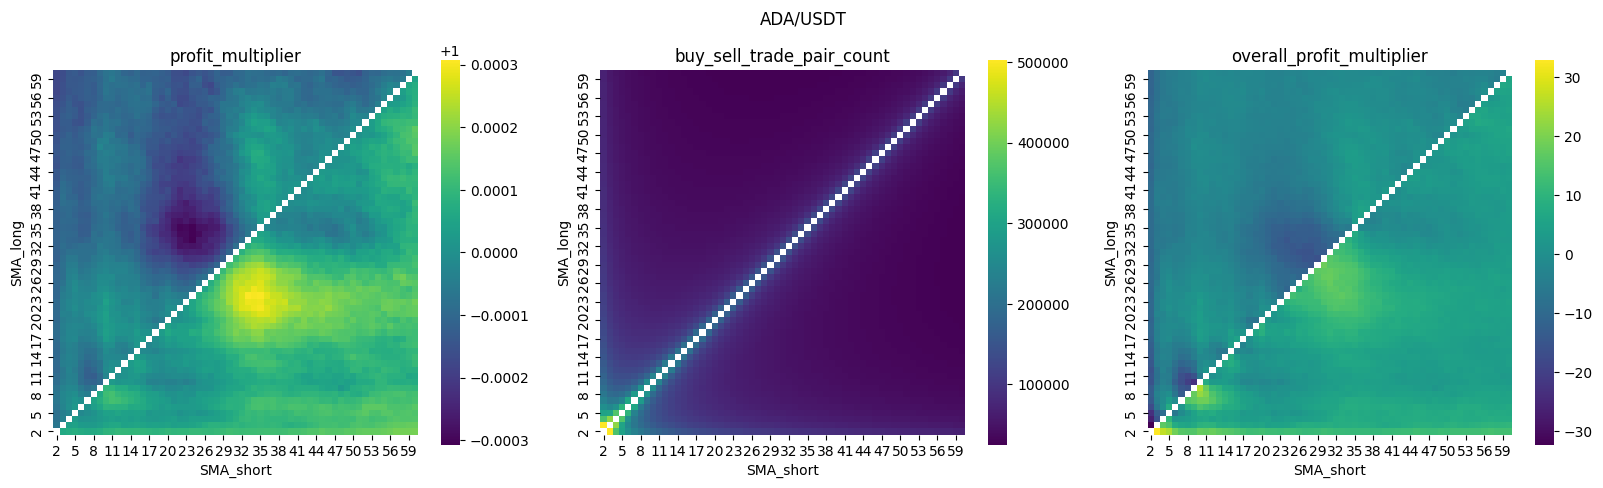

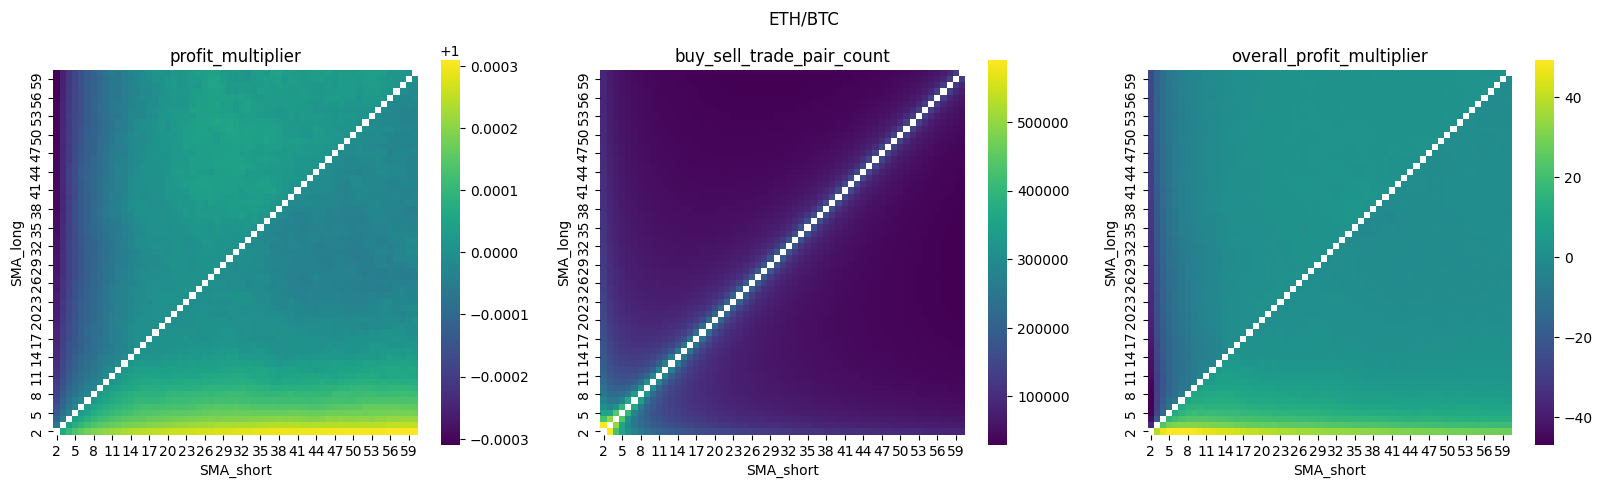

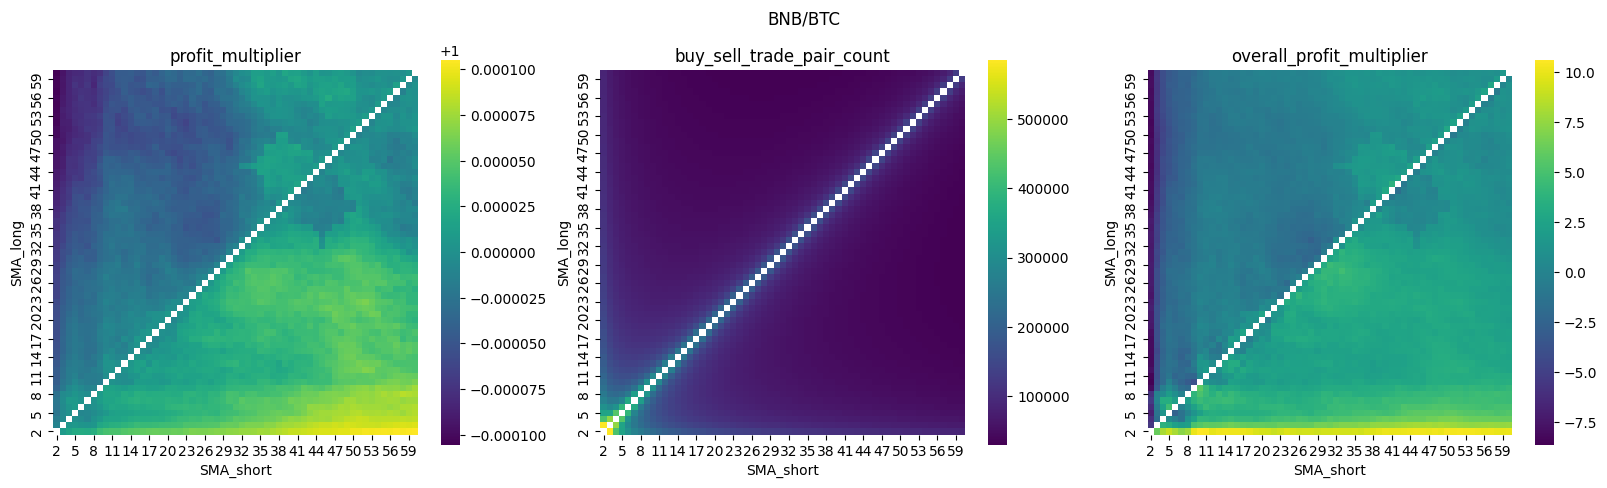

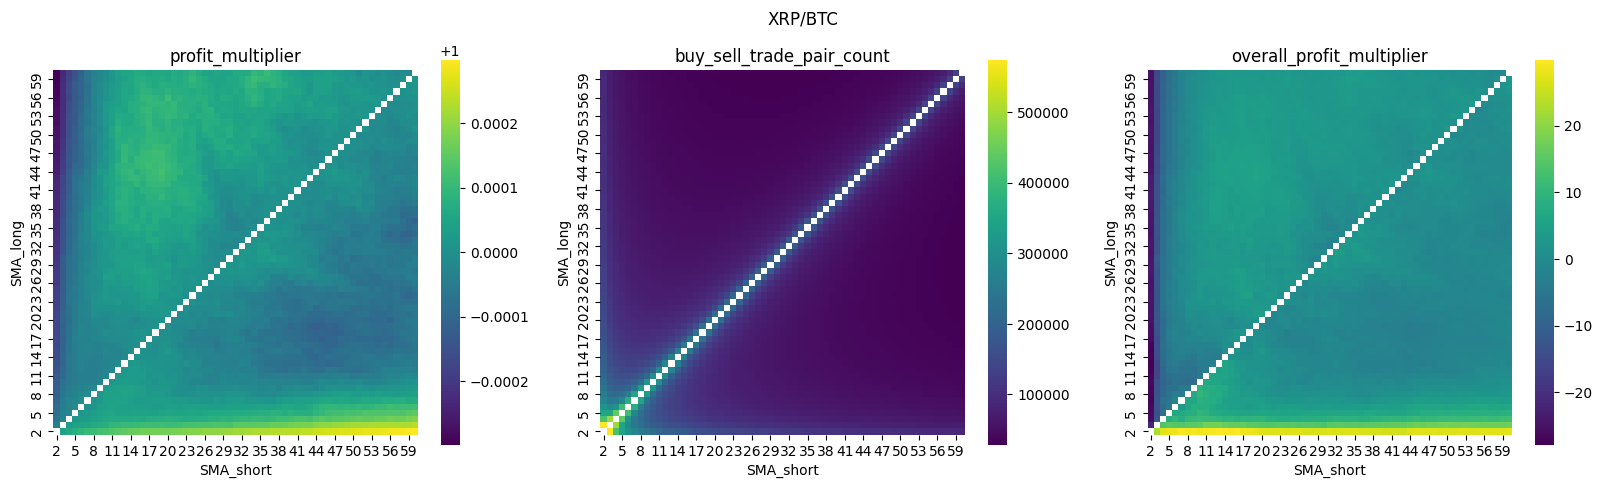

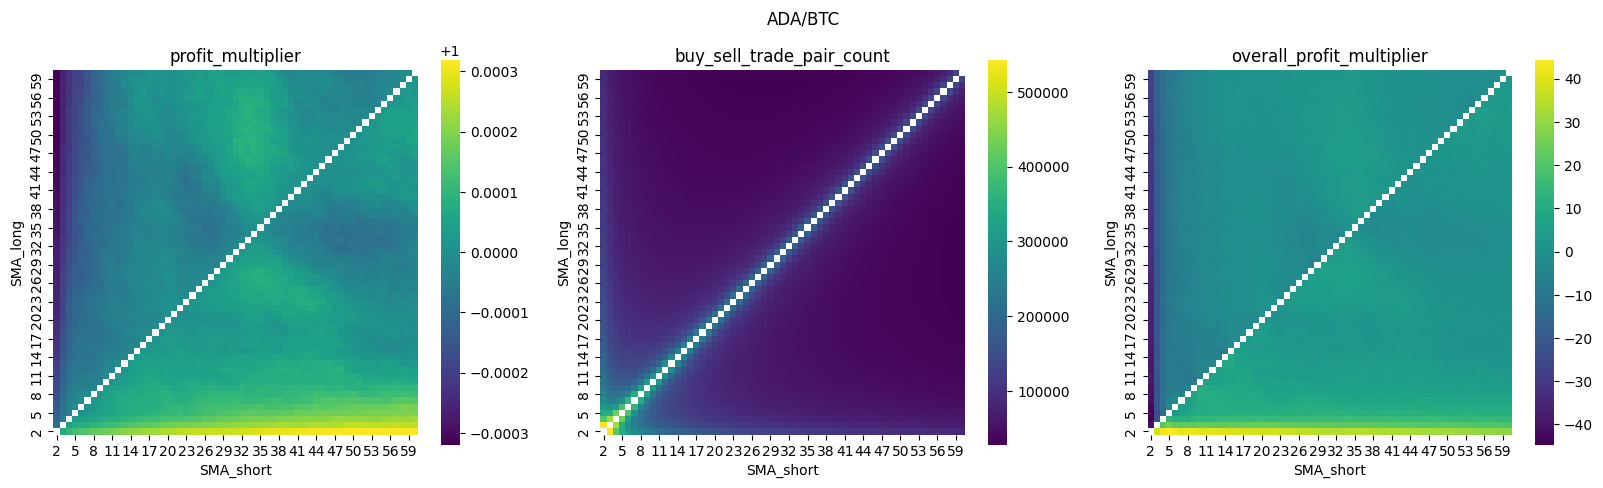

In [4]:
def show_plots(df, symbol):
    
    cols = [
        "profit_multiplier",
        "buy_sell_trade_pair_count",
        "overall_profit_multiplier"
    ]
    
    fig, axes = plt.subplots(1, len(cols), figsize=(20, 5))
    fig.suptitle(symbol)
    
    for i, col in enumerate(cols):
        matrix = df.pivot(index='SMA_long', columns='SMA_short', values=col)         
        sns.heatmap(matrix, cbar=True, square=True, cmap="viridis", ax=axes[i]).invert_yaxis()
        axes[i].set_title(col)

for symbol in symbols:
    show_plots(dfs[symbol], symbol)
